**Image Classification using CNN with Telegram Integration for Real-Time Monitoring**

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

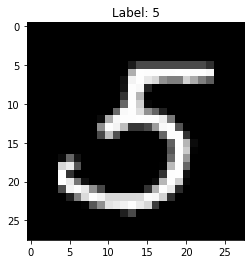

In [ ]:
var = random.randint(0,len(x_train))
plt.imshow(x_train[var], cmap='gray')
plt.title('Label: %i' % y_train[var])
plt.axis()
plt.show()

In [ ]:
def helper(ds):
  x= []
  for x_ in tfds.as_numpy(ds):
    x.append(x_)
  return np.asarray(x) / 255.0

def helper0(ds):
  y= []
  for y_ in tfds.as_numpy(ds):
    y.append(y_)
  return np.asarray(y)

x_train = tf.convert_to_tensor(x_train, np.float32)
x_test = tf.convert_to_tensor(x_test, np.float32)
train_images = helper(x_train)
train_labels = helper0(x_train)
test_images = helper(x_train)
test_labels = helper0(x_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Input, Activation, Dense, Flatten, Dropout, MaxPool2D
model = Sequential()
pixels=28
model.add(Conv2D(8, kernel_size=(3,3), padding='same', input_shape=(pixels, pixels,1))  )
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(16, kernel_size=(3,3), padding='same', input_shape=(pixels/2,pixels/2)))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(pixels/4,pixels/4)))
model.add(Activation('relu'))

#model.add(Flatten(pixels/4, 1568))
model.add(Flatten())

model.add(Dense(128, input_shape=(1, 1568)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10, input_shape=(1, 128)))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 28, 28, 8)         80        
                                                                 
 activation_39 (Activation)  (None, 28, 28, 8)         0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 14, 14, 16)        1168      
                                                                 
 activation_40 (Activation)  (None, 14, 14, 16)        0         
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                 

In [ ]:
adam = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.975, decay=2e-06, nesterov=True)
model.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6411 - accuracy: 0.7972
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3524 - accuracy: 0.8897
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3157 - accuracy: 0.9018
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2983 - accuracy: 0.9084
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2789 - accuracy: 0.9141
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2648 - accuracy: 0.9182
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2566 - accuracy: 0.9212
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2368 - accuracy: 0.9264
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2283 - accuracy: 0.9287
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.220

(1.0, 10.0)

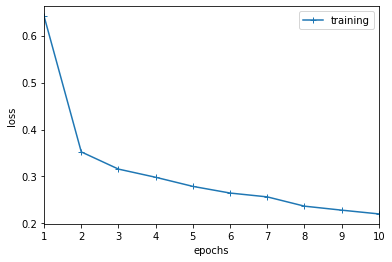

In [ ]:
p=history.history['loss']
plt.plot(range(1, 1+len(p)), p, label='training', marker='+')
plt.legend()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.xlim([1, 10])

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1926 - accuracy: 0.9396


[0.19261233508586884, 0.9395999908447266]

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.asarray([np.argmax(y) for y in y_pred])

313/313 [==============================] - 1s 2ms/step


## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf_mat = confusion_matrix(y_true=test_labels, y_pred=y_pred)#, normalize='all')

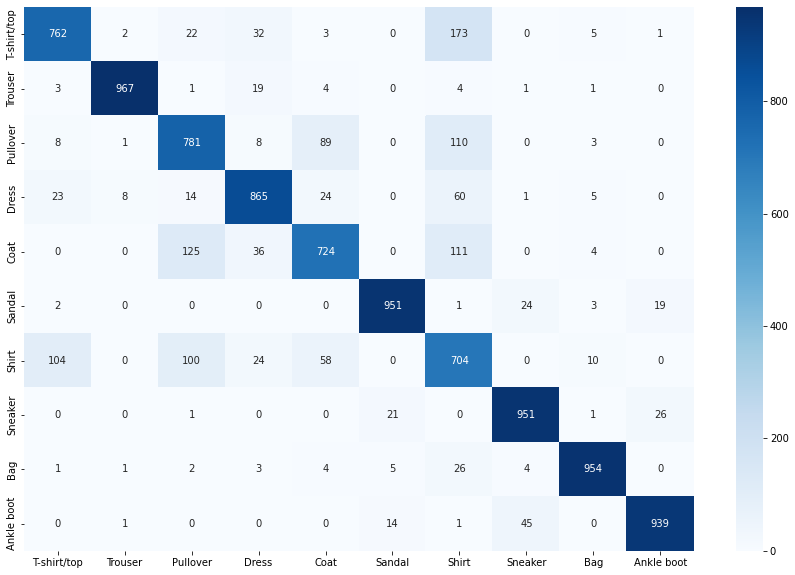

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, ax=ax, annot=True, fmt="g", cmap="Blues", xticklabels=class_names,yticklabels=class_names)

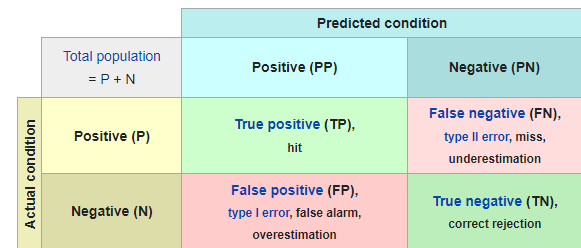

Source: https://en.wikipedia.org/wiki/Receiver_operating_characteristic

### **Precision**
$precision = \frac{TP} {TP + FP}$

### **Recall/Sensitivity/True positive rate**
$recall = \frac{TP} {TP + FN}$

### **Fall-out/False positive rate**
$fallout = \frac{FP} {FP + TN}$

### **Specificity/True negative rate**
$specificity = \frac{TN} {TN + FP}$

### **F1-score (harmonic mean of precision and recall)**
$F1 = \frac{2TP} {2TP + FP + FN}$


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.10      1.00      0.18      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# binarize labels to one-hot encoded vectors
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(train_labels)
test_labels_onehot = label_binarizer.transform(test_labels)
test_labels_onehot.shape

(10000, 10)

In [ ]:
label_binarizer.transform([2])

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
# predict y_pred again
y_pred = model.predict(test_images)
y_pred[0]

313/313 [==============================] - 0s 1ms/step


array([0.09525519, 0.07554709, 0.11870797, 0.10281047, 0.09281901,
       0.10521749, 0.11596557, 0.10425135, 0.08158526, 0.10784063],
      dtype=float32)

## **ROC curves**

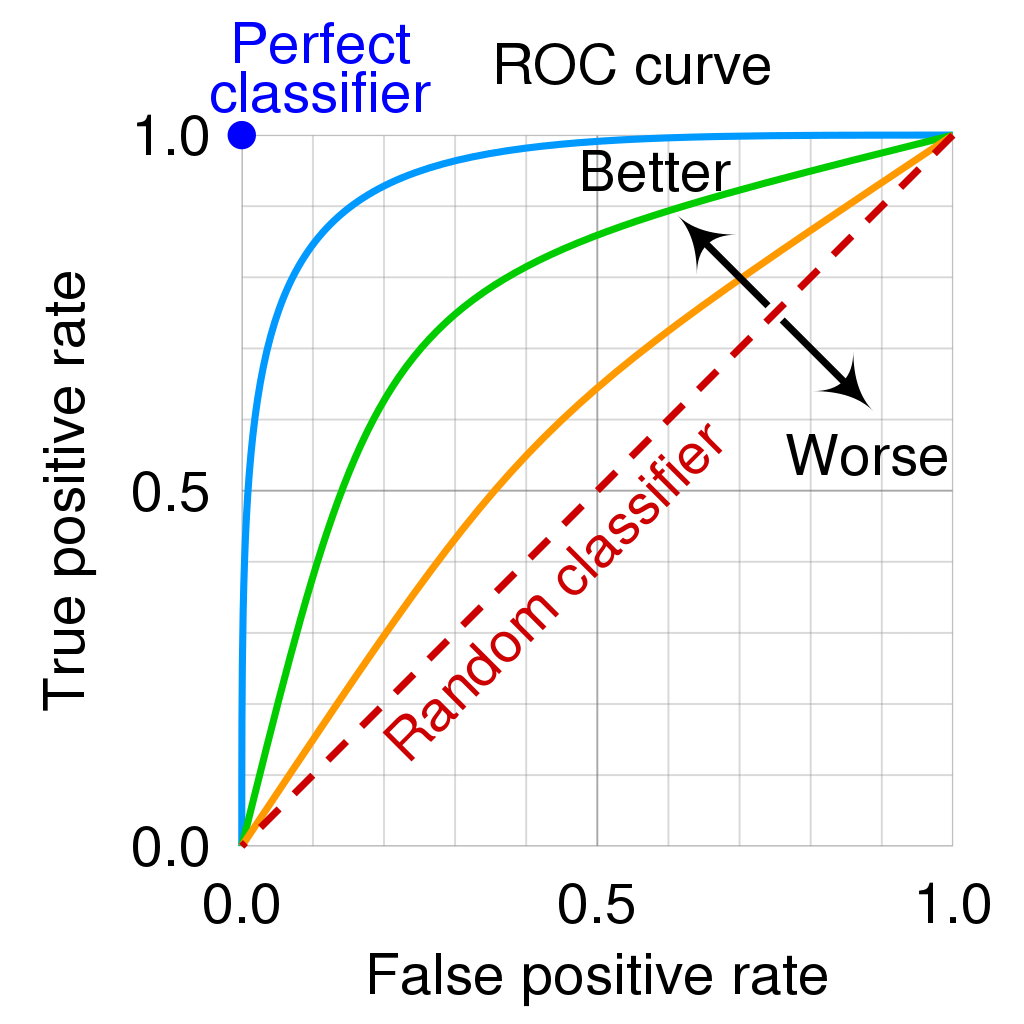

Source: https://en.wikipedia.org/wiki/Receiver_operating_characteristic#/media/File:Roc_curve.svg

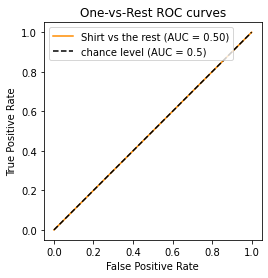

In [ ]:
# display ROC curves
from sklearn.metrics import RocCurveDisplay

class_id = 6

RocCurveDisplay.from_predictions(
    test_labels_onehot[:, class_id],
    y_pred[:, class_id],
    name=f"{class_names[class_id]} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves")
plt.legend()
plt.show()

## k-fold Cross Validation

In [ ]:
# Merge inputs and targets
inputs = np.concatenate((train_images, val_images, test_images), axis=0)
targets = np.concatenate((train_labels, val_labels, test_labels), axis=0)

inputs.shape

(70000, 28, 28, 1)

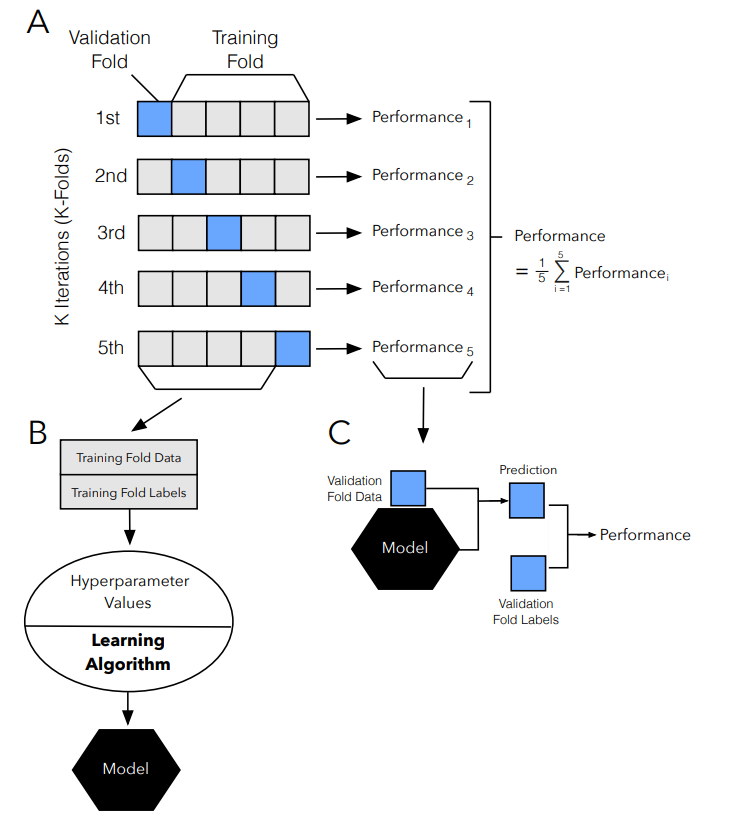

Source: https://arxiv.org/pdf/1811.12808.pdf

In [ ]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=7, shuffle=True)

In [ ]:
def get_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
  #model.add(tf.keras.layers.Dense(256, activation='relu'))
  #model.add(tf.keras.layers.Dropout(0.1))
  #model.add(tf.keras.layers.Dense(128, activation='relu'))
  #model.add(tf.keras.layers.Dense(64, activation='relu'))
  model.add(tf.keras.layers.Dense(32, activation='relu'))
  model.add(tf.keras.layers.Dense(10, activation="softmax"))

  model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.975, decay=2e-06, nesterov=True),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  return model

In [ ]:
acc_per_fold = []
loss_per_fold = []

for idx, (train, test) in enumerate(kfold.split(inputs, targets)):
  model = get_model()

  history = model.fit(inputs[train], targets[train], batch_size=128, epochs=10, verbose=0)
  scores = model.evaluate(inputs[test], targets[test])

  print(f'Score for fold {idx + 1}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

NameError: ignored

1102
1102
1102
1102
1102
1102


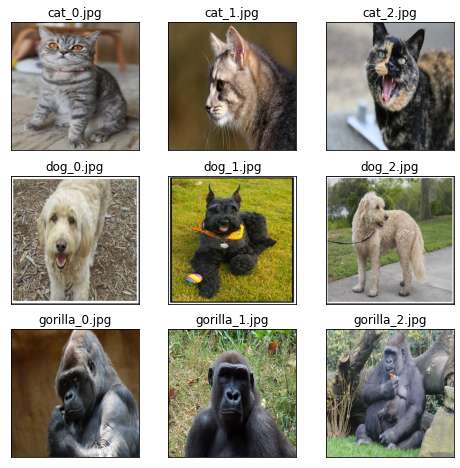

In [ ]:
import flickrapi
import urllib
from PIL import Image
import matplotlib.pyplot as plt

# Flickr api access key
flickr = flickrapi.FlickrAPI('27ad4fb82593be88c9831fa7797e08f7', 'db38c074721d298a', cache=True)

def API(animal):
    photos = flickr.walk(text=animal,
                     tags=animal,
                     extras='url_c',
                     per_page=1000,
                     sort='relevance')

    urls = []
    for i, photo in enumerate(photos):
        url = photo.get('url_c')
        urls.append(url)

        if i > 1100:
            break
    return urls

# Fetching urls for dog, cat, and gorilla
urls_dog = API('dog')
urls_cat = API('cat')
urls_gorilla = API('gorilla')


# Pulling image files and naming and resizing

# def play(urls_animal, animal):
#
#     i=0
#     count=0
#     while (count<1000):
#         if urls_animal[i]:
#             urllib.request.urlretrieve(urls_animal[i],'C:\\Users\Admin\Desktop\ds project\Flickr_Project\images\{0}_{1}.jpg'.format(animal,i))
#             image = Image.open('C:\\Users\Admin\Desktop\ds project\Flickr_Project\images\{0}_{1}.jpg'.format(animal,i))
#             image = image.resize((256, 256), Image.ANTIALIAS)
#             path = 'C:\\Users\Admin\Desktop\ds project\Flickr_Project\images\{0}_{1}.jpg'.format(animal,i)
#             image.save(path)
#             count+=1
#         else:
#             print("Skipping url_{0} index: ".format(animal), i)
#         i+=1

# play(urls_dog,'dog')
# play(urls_cat,'cat')
# play(urls_gorilla,'gorilla')

# Plotting images

fig, ax = plt.subplots(3, 3, figsize=(8, 8))

P=[[urls_cat[1],urls_cat[2],urls_cat[3]],
    [urls_dog[1],urls_dog[2],urls_dog[3]],
    [urls_gorilla[1],urls_gorilla[2],urls_gorilla[3]]]
Q=["cat", "dog", "gorilla"]

# Iterating through the urls and plotting the images
for i in range(3):
    for j in range(3):
        # Open the image using the url
        image = Image.open(urllib.request.urlopen(P[i][j]))
        # path = urls_cat[j]
        # image = Image.open(path)
        image = image.resize((256, 256),  Image.ANTIALIAS)

        ax[i, j].imshow(image)
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        ax[i, j].set_title('{1}_{0}.jpg'.format(j,Q[i]))

In [ ]:
pip install flickrapi

In [ ]:
from google.colab import files

In [ ]:
files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import os
import glob
import random
from keras.optimizers import RMSprop
import flickr100 as fk
from tensorflow.keras import layers

# Define the ResNet block
def resnet_block(inputs, filters, strides=1):
    x = layers.Conv2D(filters, 3, strides=strides, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    shortcut = layers.Conv2D(filters, 1, strides=strides)(inputs)
    shortcut = layers.BatchNormalization()(shortcut)

    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

# Create the input layer
inputs = layers.Input(shape=(256, 256, 3))

# Add the first convolutional layer
x = layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPool2D(3, strides=2, padding='same')(x)

# Add the ResNet blocks
for filters in [64, 128, 256, 512]:
    for _ in range(3):
        x = resnet_block(x, filters)

# Add the global average pooling layer
x = layers.GlobalAvgPool2D()(x)

# Add the output layer
outputs = layers.Dense(3, activation='softmax')(x)

# Create the model
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create the data generator
datagen = ImageDataGenerator(rescale=1./255)

train_folder_path = '/content/drive/MyDrive/AiTrain'
val_folder_path = '/content/drive/MyDrive/AiVal'
test_folder_path = '/content/drive/MyDrive/AiTest'

#Load the data
train_data = datagen.flow_from_directory(directory=train_folder_path,
                                        target_size=(256, 256),
                                        class_mode='categorical',
                                        batch_size=32)

# validation data part
val_datagen = ImageDataGenerator(rescale=1./255)
val_data = val_datagen.flow_from_directory(directory=val_folder_path,
                                           target_size=(256, 256),
                                           class_mode='categorical',
                                           batch_size=32)

# test data part
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(directory=test_folder_path,
                                             target_size=(256, 256),
                                             class_mode='categorical',
                                             batch_size=32)

# Telegram thing
import requests
personal_token = '5970460932:AAH92CBsf6sINnTIvddtVAxKIEa3r64ZZq0'
ping_url = 'https://api.telegram.org/bot'+str(personal_token)+'/getUpdates'
response = requests.get(ping_url).json()
# chat_id = response['result'][0]['message']['chat']['id']
chat_id = 5089539705


class BotCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):

        message = "Epoch: {}/10 - Accuracy: {:.4f} - Loss: {:.4f}".format(1+epoch, logs.get('accuracy'), logs.get('loss'))
        send_message_url = 'https://api.telegram.org/bot'+str(personal_token)+'/sendMessage?chat_id='+str(chat_id)+'&text='+message
        response = requests.get(send_message_url)

        if epoch+1 == 10:
          test_loss, test_acc = model.evaluate(test_data)
          message = "Test accuracy achieved: {0:.4f}\n Test loss: {1:.4f}".format(test_acc,test_loss)
          send_message_url_test = 'https://api.telegram.org/bot'+str(personal_token)+'/sendMessage?chat_id='+str(chat_id)+'&text='+message
          response = requests.get(send_message_url_test)

# Creating an instance
bot_callback = BotCallback()


model.fit(train_data, epochs=10, validation_data=val_data, callbacks=[bot_callback])


In [ ]:
test_loss, test_acc = model.evaluate(test_data)
message = "Test accuracy achieved: {0}".format(test_acc)
send_message_url = 'https://api.telegram.org/bot'+str(personal_token)+'/sendMessage?chat_id='+str(chat_id)+'&text='+message
response = requests.get(send_message_url)


14/14 [==============================] - 146s 11s/step - loss: 568.5997 - accuracy: 0.3227


In [ ]:
# Telegram thing
import tensorflow as tf
import requests
personal_token = '5970460932:AAH92CBsf6sINnTIvddtVAxKIEa3r64ZZq0'
ping_url = 'https://api.telegram.org/bot'+str(personal_token)+'/getUpdates'
response = requests.get(ping_url).json()
# chat_id = response['result'][0]['message']['chat']['id']
chat_id = 5089539705


class BotCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):

        message = "Epoch: {}/10 - Accuracy: {:.4f} - Loss: {:.4f}".format(1+epoch, logs.get('accuracy'), logs.get('loss'))
        send_message_url = 'https://api.telegram.org/bot'+str(personal_token)+'/sendMessage?chat_id='+str(chat_id)+'&text='+message
        response = requests.get(send_message_url)

SyntaxError: ignored